In [1]:
# imports and loading
from pymodulon.io import *
from pymodulon.plotting import *
from scipy.stats import fisher_exact, chi2_contingency
from statsmodels.stats.multitest import multipletests
from os import path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import squarify  # For treemap plotting
import sys
sys.path.insert(0, '../functions/matplotlib-extra-master/src')
import mpl_extra.treemap as tr
import warnings
warnings.simplefilter(action='ignore')

data_dir = path.join('..','data','processed_data')
interim_dir = path.join('..','data','interim')
ica_data = load_json_model(path.join(data_dir,'ZM4_ica.json.gz'))

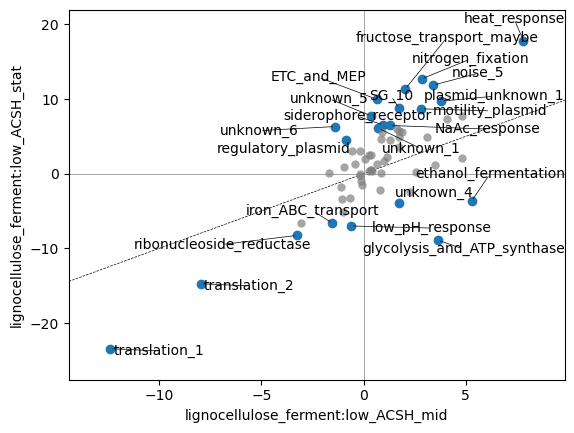

In [9]:
# dima plotting
sample1 = 'lignocellulose_ferment:low_ACSH_mid'
sample2 = 'lignocellulose_ferment:low_ACSH_stat'
iM = 'nitrogen_fixation'
table = plot_dima(ica_data, sample1, sample2, label = True,
          threshold = 5, table = True, fdr = 1)
plt.savefig('../figures/dima_plot.pdf', transparent = True)
plt.show()

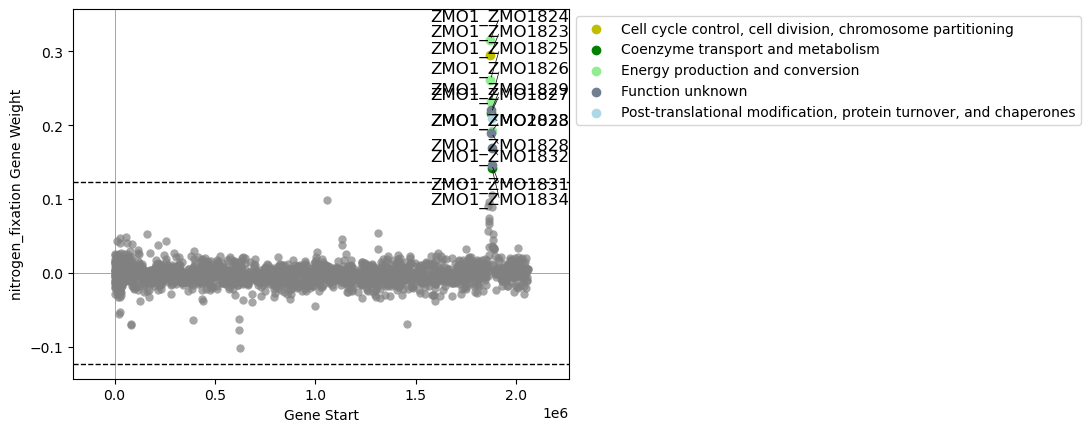

In [10]:
# gene weight plotting
plot_gene_weights(ica_data, iM)
plt.savefig('../figures/gene_weights.pdf', transparent = True)
plt.show()

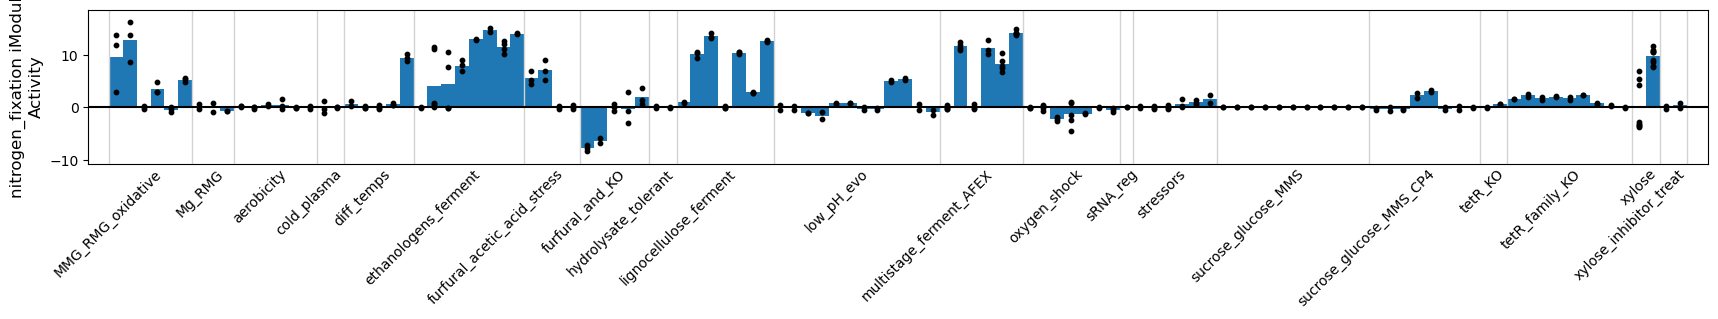

In [11]:
# plot activities
plot_activities(ica_data, iM)
plt.savefig('../figures/iM_activities.pdf', transparent = True)
plt.show()

# playground

In [14]:
len(set(ica_data.sample_table.full_name))

114

In [15]:
ica_data.gene_table

,gene_name,accession,start,end,strand,gene_product,COG,regulator,uniprot,kegg_maps,...,aero_glucose_model_growth_perc_change,FIMO_regulators,LDI_early_glucose_fold_change,LDI_late_glucose_fold_change,LDI_early_xylose_fold_change,LDI_late_xylose_fold_change,no_LDI_early_glucose_fold_change,no_LDI_late_glucose_fold_change,no_LDI_early_xylose_fold_change,no_LDI_late_xylose_fold_change
ZMO1_ZMO0001,NaN,NaN,NaN,NaN,NaN,NaN,No COG category,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZMO1_ZMO0002,NaN,NaN,NaN,NaN,NaN,NaN,No COG category,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZMO1_ZMO0003,NaN,NaN,NaN,NaN,NaN,NaN,No COG category,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZMO1_ZMO0004,NaN,NaN,NaN,NaN,NaN,NaN,No COG category,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZMO1_ZMO0005,ZMO1_ZMO0005,CP023715.1,5781.0,6689.0,-,sulfate adenylyltransferase small subunit,Amino acid transport and metabolism,NaN,Q5NRM5,map00230;map00261;map00450;map00920;map01100;m...,...,2.010000e-15,[],1.0,0.809349,0.781906,0.856889,1.0,0.787517,0.762041,0.962930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZMO1_ZMOp39x032,ZMO1_ZMOp39x032,CP023719.1,36091.0,37524.0,-,winged helix-turn-helix DNA-binding domain pro...,Transcription,NaN,NaN,NaN,...,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZMO1_ZMOp39x033,ZMO1_ZMOp39x033,CP023719.1,37631.0,37882.0,-,hypothetical protein,No COG annotation,NaN,NaN,NaN,...,NaN,"['CosR_Campylobacter_jejuni', 'HilC_Salmonella...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZMO1_ZMOp39x036,ZMO1_ZMOp39x036,CP023719.1,38007.0,38324.0,-,hypothetical protein,No COG annotation,NaN,NaN,NaN,...,NaN,"['CosR_Campylobacter_jejuni', 'HilC_Salmonella...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZMO1_ZMOp39x037,ZMO1_ZMOp39x037,CP023719.1,38314.0,38535.0,-,hypothetical protein,No COG annotation,ZMO1412,NaN,NaN,...,NaN,"['CosR_Campylobacter_jejuni', 'HilC_Salmonella...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
ica_data.imodulon_table.explained_variance.sum()

np.float64(0.6348356852077549)

In [21]:
ica_data.imodulon_table.sort_values(by = 'explained_variance')

,category,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,single_gene,percent_anaero_essential,percent_aero_essential,explained_variance
unknown_7,uncharacterized,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,NaN,True,0.000000,0.029412,0.000664
SG_16,single gene,ZMO0100+ZMO0478,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1,2.0,True,0.000000,0.000000,0.000684
SG_18,single gene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,True,1.000000,1.000000,0.000753
SG_9,single gene,ZMO0050+ZMO0244,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1,2.0,True,0.000000,0.000000,0.000950
SG_14,single gene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,True,0.000000,0.000000,0.001068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fructose_transport_maybe,poorly characterized,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN,NaN,0.000000,0.000000,0.023697
noise_5,noise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156,NaN,True,0.141026,0.134615,0.027218
ethanol_fermentation,metabolism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,0.000000,0.050000,0.032759
translation_1,translation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,NaN,NaN,0.106383,0.148936,0.069874


In [34]:
in_iM = set()
for iM in ica_data.imodulon_table.index:
    for gene in ica_data.view_imodulon(iM).index:
        in_iM.add(gene)

In [35]:
len(in_iM) / len(ica_data.gene_table.index)

0.39007832898172323